<a href="https://colab.research.google.com/github/Jaavion/DS-Unit-2-Sprint-2-Regression/blob/master/module1-ols-regression/linear-regression-assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [17]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
%matplotlib inline
from ipywidgets import interact
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [37]:
features = 'zipcode'
train = 'price'
X = df[features]
y = df[train]
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     61.34
Date:                Mon, 06 May 2019   Prob (F-statistic):           5.01e-15
Time:                        21:18:44   Log-Likelihood:            -3.0757e+05
No. Observations:               21613   AIC:                         6.152e+05
Df Residuals:                   21611   BIC:                         6.152e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.634e+07   4.57e+06      7.950      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [20]:
model = LinearRegression()
model.fit(X, y)
print('Intercept:', model.intercept_)
pd.Series(model.coef_, features)
#where my line hits the y axis

Intercept: 36343815.676451325


zipcode   -365.05383
dtype: float64

In [0]:
X = df.drop(['price', 'id', 'date'], axis=1)
y = df['price']


In [22]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2)

In [29]:
model = LinearRegression()
model.fit(X, y)
print('Intercept:', model.intercept_)
pd.Series(model.coef_, X.columns)


Intercept: 6690324.603091352


bedrooms         -35766.541444
bathrooms         41144.278532
sqft_living         110.442865
sqft_lot              0.128598
floors             6689.550115
waterfront       582960.458423
view              52870.942384
condition         26385.649139
grade             95890.445151
sqft_above           70.785224
sqft_basement        39.657640
yr_built          -2620.223211
yr_renovated         19.812584
zipcode            -582.419866
lat              602748.226449
long            -214729.828253
sqft_living15        21.681400
sqft_lot15           -0.382642
dtype: float64

In [25]:
xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((17290, 18), (4323, 18), (17290,), (4323,))

In [26]:
np.sqrt(mean_squared_error(y, model.predict(X)))

201163.90222277163

In [0]:
import matplotlib.pyplot as plt
ax = df.plot(x=xTrain, y=yTrain, kind='scatter', title='sklearn LinearRegression')
df.plot(x=X__, y=y, kind='line', ax=ax);

In [36]:
features

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10243,4,2.0,1750,7245,1.0,0,0,4,7,1050,700,1974,0,98092,47.3164,-122.196,1640,7245
10132,4,2.0,3740,32417,2.0,0,0,3,9,3740,0,2000,0,98053,47.6728,-122.012,3180,32417
2031,1,1.0,900,4368,1.0,0,0,5,6,900,0,1915,1950,98022,47.2107,-121.990,1290,5000
21410,4,3.5,3510,9084,2.0,0,0,3,10,3510,0,2001,0,98065,47.5402,-121.875,3690,9568
12832,3,2.5,2970,23100,1.0,0,0,3,7,1510,1460,1967,0,98072,47.7735,-122.133,2390,20300


In [0]:
X_2 
y_2

In [77]:
features = 'zipcode'
train = 'price'
X_2 = df[features]
y_2 = df[train]
model = sm.OLS(y, sm.add_constant(X_2))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     61.34
Date:                Mon, 06 May 2019   Prob (F-statistic):           5.01e-15
Time:                        21:53:27   Log-Likelihood:            -3.0757e+05
No. Observations:               21613   AIC:                         6.152e+05
Df Residuals:                   21611   BIC:                         6.152e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.634e+07   4.57e+06      7.950      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [81]:
model = LinearRegression()
model.fit(xTrain, yTrain)
print('Intercept:', model.intercept_)
print(model.coef_)

Intercept: 34652047.161371954
[-347.79498537]


In [0]:

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X_2, y_2, test_size = 0.2)

KeyError: ignored

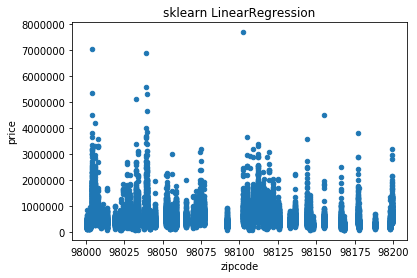

In [119]:
ax = df.plot(x=features, y=train, kind='scatter', title='sklearn LinearRegression')
df.plot(x=X_2, y=X_pred, kind='line');

In [0]:
X_pred = X_pred.reset_index()

In [0]:
X_pred = pd.DataFrame(X_pred)

In [114]:
X_pred.head()

,0
0,506231
1,524664
2,558400
3,520838
4,542401


In [116]:
X_pred.shape

(21613, 1)

In [0]:
X_pred = X_pred.drop('index', axis = 1)



In [0]:
X_pred = X_pred.astype(dtype = 'int64')

In [0]:

Test_x = model.predict(X_pred)

In [0]:
X_pred = model.predict(X_2)

In [78]:
X_2 = X_2.as_matrix().reshape(-1,1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [43]:
model = LinearRegression()
model.fit(X_2, y_2)
print('Intercept:', model.intercept_)
pd.Series(model.coef_, feature)

ValueError: ignored

In [0]:
def regression(m, b):
    df['Prediction'] = m * df[feature] + b
    df['Error'] = df['Prediction'] - df[target]
    df['Absolute Error'] = df['Error'].abs()
    sum_absolute_error = df['Absolute Error'].sum()
    
    title = f'Sum of absolute errors: {sum_absolute_error}'
    ax = df.plot(x=feature, y=target, kind='scatter', title=title, figsize=(7, 7))
    df.plot(x=feature, y='Prediction', kind='line', ax=ax)
    
regression(m=4, b=48)

In [122]:
feature = 'zipcode'
target = 'price'
X = df[features]
y = df[train]
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     61.34
Date:                Tue, 07 May 2019   Prob (F-statistic):           5.01e-15
Time:                        03:03:20   Log-Likelihood:            -3.0757e+05
No. Observations:               21613   AIC:                         6.152e+05
Df Residuals:                   21611   BIC:                         6.152e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.634e+07   4.57e+06      7.950      0.0

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [131]:
m = 4
b = 32
df['Prediction'] = m * df[feature] + b
df['Error'] = df['Prediction'] - df[target]
df['Absolute Error'] = df['Error'].abs()
df['Absolute Error'].sum()

4935896586.0

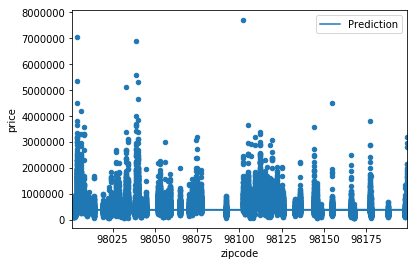

In [132]:
ax = df.plot(x=feature, y=target, kind='scatter')
df.plot(x=feature, y='Prediction', kind='line', ax=ax);

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:
##### Your Code Here #####

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
